In [1]:
#  Mayorov Igor

In [2]:
# Устанавливаем все необходимые библиотеки для начала работы.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Загружаем наш датасет
mk = pd.read_csv('mywork.csv', sep=',')


In [4]:
# Смотрим что было загружено в переменную.
mk

,totsp,livesp,kitsp,dist,metrdist,floor,price
0,58,40,6.0,12.5,7,10,81
1,44,28,6.0,13.5,7,2,75
2,70,42,6.0,14.5,3,7,128
3,61,37,6.0,13.5,7,12,95
4,104,60,11.0,10.5,7,15,330
...,...,...,...,...,...,...,...
2035,77,45,10.0,12.0,5,1,110
2036,60,43,6.0,9.0,5,1,95
2037,60,46,5.0,10.5,5,1,95
2038,76,48,10.0,12.5,5,1,129


In [5]:
# Смотрим статистику нашего датасета
mk.describe()

,totsp,livesp,kitsp,dist,metrdist,floor,price
count,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000
mean,73.084314,46.337255,8.898529,11.015686,8.117157,1.326471,127.496569
std,15.123450,7.894348,2.787073,3.375539,3.815574,2.323365,51.878220
min,44.000000,28.000000,5.000000,3.000000,1.000000,0.000000,50.000000
25%,62.000000,42.000000,7.000000,9.000000,5.000000,1.000000,95.000000
50%,73.500000,45.000000,9.000000,12.000000,7.000000,1.000000,115.000000
75%,79.000000,50.000000,10.000000,13.500000,10.000000,1.000000,142.000000
max,192.000000,102.000000,25.000000,17.000000,20.000000,16.000000,730.000000


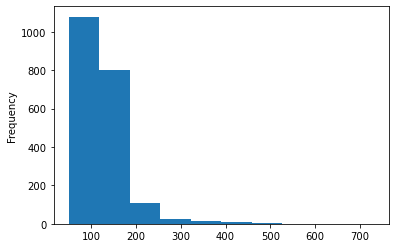

In [6]:
# Построим гистаграмы по каждой из переменных
mk['price'].plot(kind = 'hist')

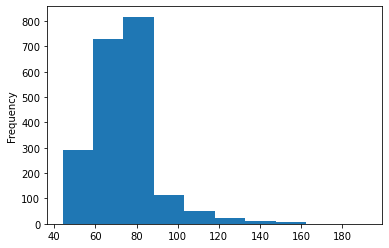

In [7]:
mk['totsp'].plot(kind = 'hist')

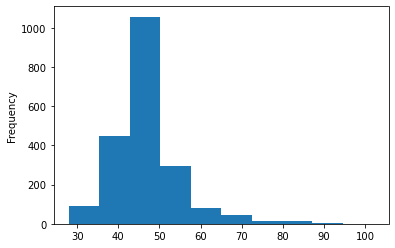

In [8]:
mk['livesp'].plot(kind = 'hist')

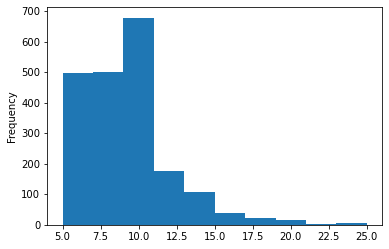

In [9]:
mk['kitsp'].plot(kind = 'hist')

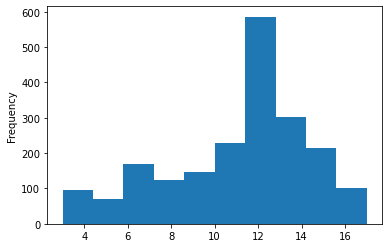

In [10]:
mk['dist'].plot(kind = 'hist')

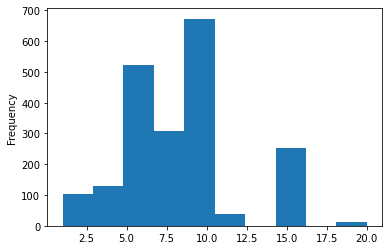

In [11]:
mk['metrdist'].plot(kind = 'hist')

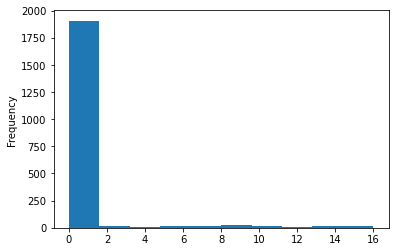

In [12]:
mk['floor'].plot(kind = 'hist')

In [13]:
# Строим корреляционную матрциу. Наиболее коррелируемым фактором является для Price >> totsp. Это нужно для того что бы построить однофакторную линенйную регрессию.
mk.corr ()

,totsp,livesp,kitsp,dist,metrdist,floor,price
totsp,1.000000,0.862236,0.781536,-0.114698,-0.041426,0.021925,0.756042
livesp,0.862236,1.000000,0.573528,-0.197228,-0.052112,0.016589,0.729614
kitsp,0.781536,0.573528,1.000000,-0.061874,-0.028490,0.030567,0.597235
dist,-0.114698,-0.197228,-0.061874,1.000000,0.099185,-0.046410,-0.331563
metrdist,-0.041426,-0.052112,-0.028490,0.099185,1.000000,-0.013002,-0.152116
floor,0.021925,0.016589,0.030567,-0.046410,-0.013002,1.000000,0.060632
price,0.756042,0.729614,0.597235,-0.331563,-0.152116,0.060632,1.000000


In [14]:
# Делим наш дата сет на обучающую и тестовую выборку. Записываем в х все парамеры  кроме у(Price). И указываем в чанке что мы будем рассматривать значения с 0 по 1 столбцы при этом 0 включается а 1 нет.
X = mk.iloc[:, :-1].values 
y = mk.iloc[:, 6].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [15]:
# Строим простую линейную регрессию зависимости от одного фактора (totsp)
from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[:, 0:1], y_train)

In [16]:
# Оцениваем полученные параметры
sr.coef_, sr.intercept_

(array([2.55696057]), -59.29467080960626)

In [17]:
# Делаем прогноз 
y_pred = sr.predict(X_test[:, 0:1])

In [18]:
# Проверяем кэф. детерминации, который для обучающей выборки 0.56 значение но  0.54 для тестовой , что является неудовлетвориельным значением доверия.
sr.score(X_train[:, 0:1], y_train), sr.score(X_test[:, 0:1], y_test)

(0.5796671038371893, 0.5442070170736983)

In [19]:
# Расчитываем среднеквадратическую ошибку. Для обучающей выборки ошибка меьнше, чем для тестовой. Но исходя из полученных коэфициентов следует что цена не зависит от фактора totspю Об этом свидетельствует ошибка которую мы получили. Для более точной модели необходимо включить в модель больше факторовб что мы сделаем далее при построении множественной регресии.
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[:, 0:1])), mean_squared_error(y_test, y_pred)

(1087.0619959619353, 1415.3669644724396)

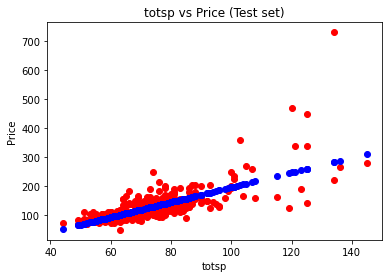

In [20]:
# Проиллюстрируем полученную модель. Можно сделать следующие выводы, что простая линейная регрессия описывает модель не точно.
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_test[:,0], sr.predict(X_test[:, 0:1]), 'bo')
plt.title('totsp vs Price (Test set)')
plt.xlabel('totsp')
plt.ylabel('Price')  
plt.show()

In [21]:
# Множественная регрессия. Проверяем P value - делаем выводы , что практически все 5 переменных  значимы и будем использовать их как основу.
import statsmodels.api as sm
X = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X).fit()
#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     536.1
Date:                Sun, 20 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:43:05   Log-Likelihood:                -7836.9
No. Observations:                1632   AIC:                         1.569e+04
Df Residuals:                    1625   BIC:                         1.573e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.5593      5.834     -2.838      0.005     -28.002      -5.116
x1             1.6819      0.128     13.161      0.000       1.431       1.933
x2             1.1752      0.195      6.015      0.000       0.792       1.558
x3             1.5861      0.427      3.712      0.000       0.748       2.424
x4            -3.4453      0.222    -15.493      0.000      -3.882      -3.009
x5            -1.3073      0.193     -6.766      0.000      -1.686      -0.928
x6             0.9346      0.324      2.888      0.004       0.300       1.569
==============================================================================
Omnibus:                      698.506   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6085.932
Skew:                           1.775   Prob(JB):                         0.00
Kurtosis:                      11.769   Cond. No.                         715.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Определяем значимые переменные с погрешностью 5%.
def backwardElimination(x, sl):
    x = sm.add_constant(x)
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x

import statsmodels.api as sm         
SL = 0.05
X_opt = X_train
y = y_train
X_Modeled = backwardElimination(X_opt, SL)

In [24]:
#Включим в переменную все факторы кроме одного для построения и оценки модели. 
X_train = X_train[:, [0,1,2,3,4,5]]
X_test = X_test[:, [0,1,2,3,4,5]]

In [26]:
# Строим множественную регрессию на обучающейся выборке.
mr = LinearRegression().fit(X_train, y_train)

In [27]:
# Получаем и оцениваем параметры.
mr.coef_, mr.intercept_

(array([ 1.68187405,  1.17524348,  1.58605998, -3.44533096, -1.30733549,
         0.93464348]),
 -16.559285523410296)

In [28]:
# Строим прогноз.
y_pred = mr.predict(X_test)

In [29]:
# Проверяем кэф. детерминации, который равен 0.66 для обучающей,и 0.72 для тествой что сравнимо лучше чем в моделе однофактороной регрессии, но по прежнему низкий. Данную модель можно использовать для пронозирования, коэфициент детерменации достаточно высокий и немного не дотягивает до минимальной нормы.
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.664386329424349, 0.6282471018687572)

In [30]:
# Расчитываем среднеквадратическую ошибку. Ошибка стала  меньше практически в 2 раза в  сравнении с однофакторной регрессией, что даказывает что для прогнозирования нужно включать больше факторов для болеее точной оценки.
mean_squared_error(y_train, mr.predict(X_train)), mean_squared_error(y_test, y_pred)

(867.961727332341, 1154.3985771429184)

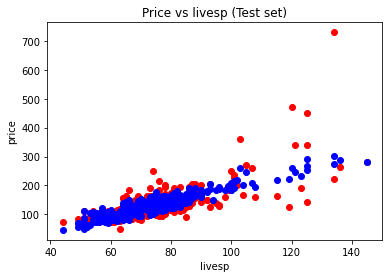

In [31]:
# Проиллюстрируем полученную модель. Можно сделать следующие выводы, что множественная линейная регрессия описывает модель лучше, чем однофакторная, стала в разы  точнее.
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_test[:,0], mr.predict(X_test), 'bo')
plt.title('Price vs livesp (Test set)')
plt.xlabel('livesp')
plt.ylabel('price')
plt.show()

In [32]:
# Построим полиномиальную регрессию для нашего датасета.
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train)
X_test_p = PolynomialFeatures().fit_transform(X_test)
pr = LinearRegression().fit(X_train_p[:,1:], y_train)

In [33]:
# Получаем и оцениваем параметры
pr.coef_, pr.intercept_

(array([ 2.74338472e+00, -5.62880637e+00,  4.00706172e+00,  7.95478464e-01,
        -1.13398013e+00, -1.53253921e+00,  4.62688585e-03, -1.24583061e-02,
        -1.83098828e-02, -1.33712216e-01,  5.48110125e-02, -9.94315335e-02,
         6.97683474e-02,  3.98389245e-02,  8.47299531e-02, -1.18328984e-01,
         1.20127821e-01, -7.07520708e-02, -1.21210125e-01, -9.43234521e-02,
         7.34011041e-01,  1.23839816e-01,  6.46575770e-03,  3.95947443e-02,
         1.33263211e-01, -3.14170386e-02, -1.84063305e-01]),
 81.39891048594392)

In [34]:
# Строим прогноз
y_pred = pr.predict(X_test_p[:,1:])

In [35]:
# Проверяем кэф. детерминации,0,68 для обучающей и 0.74 для тестовой. Кэф. детерминации немного увеличился  в сравнении с множественноей регрессией. Данная модель будет немного точнее описать данные. 
pr.score(X_train_p[:,1:], y_train), pr.score(X_test_p[:,1:], y_test)

(0.7190325543963336, 0.7435176650130797)

In [36]:
# Расчитываем среднеквадратическую ошибку. Ошибка меньше в сравнении с множественной регрессией.
mean_squared_error(y_train, pr.predict(X_train_p[:,1:])), mean_squared_error(y_test, y_pred)

(726.6360425426805, 796.4506640286252)

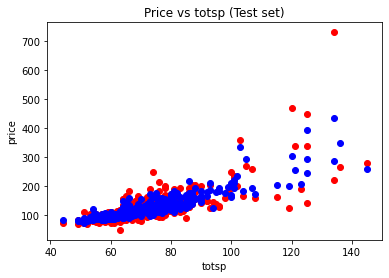

In [37]:
# Проиллюстрируем полученную модель. Можно сделать следующие выводы, что полиномиальная регрессия описывает модель лучше, чем однофакторная и множественная. Модель более точно описывает значения.
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_test[:,0], pr.predict(X_test_p[:,1:]), 'bo')
plt.title('Price vs totsp (Test set)')
plt.xlabel('totsp')
plt.ylabel('price')
plt.show()

In [38]:
#Проведем оценку с помощью нейронной сети. 
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('kr_reg1.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [40]:
# Загружаем наши данные для построения нейронной сети.
import pickle
input = open('kr_reg1.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

In [41]:
# Проводим шкалирование.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(np.array([[i] for i in y_train]))
y_train = sc_y.transform(np.array([[i] for i in y_train]))
y_test = sc_y.transform(np.array([[i] for i in y_test]))

In [42]:
# Подключаем необходимые библиотеки.
import keras
from keras.models import Sequential
from keras.layers import Dense

In [43]:
# Создаём сеть RNN, она будет последовательной. На первом и втором слое берем тангенс для повышенной точности. Для последнего слоя используем линейную функцию активациит 
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(units = 8, activation = 'tanh', input_dim = 6))

# Adding the second hidden layer
rnn.add(Dense(units = 4, activation = 'tanh'))

# Adding the output layer
rnn.add(Dense(units = 1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [44]:
# Обучаем нашу нейронную сеть.
rnn.fit(X_train, y_train, epochs=100, batch_size = 10)

Epoch 1/100
164/164 [==============================] - 0s 2ms/step - loss: 0.7447 - accuracy: 0.0000e+00
Epoch 2/100
164/164 [==============================] - 0s 2ms/step - loss: 0.5461 - accuracy: 0.0000e+00
Epoch 3/100
164/164 [==============================] - 0s 2ms/step - loss: 0.4874 - accuracy: 0.0000e+00
Epoch 4/100
164/164 [==============================] - 0s 2ms/step - loss: 0.4576 - accuracy: 0.0000e+00
Epoch 5/100
164/164 [==============================] - 0s 2ms/step - loss: 0.4341 - accuracy: 0.0000e+00
Epoch 6/100
164/164 [==============================] - 0s 3ms/step - loss: 0.4152 - accuracy: 0.0000e+00
Epoch 7/100
164/164 [==============================] - 0s 2ms/step - loss: 0.4041 - accuracy: 0.0000e+00
Epoch 8/100
164/164 [==============================] - 0s 2ms/step - loss: 0.3939 - accuracy: 0.0000e+00
Epoch 9/100
164/164 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.0000e+00
Epoch 10/100
164/164 [==============================] -

164/164 [==============================] - 0s 2ms/step - loss: 0.2925 - accuracy: 0.0000e+00
Epoch 79/100
164/164 [==============================] - 0s 1ms/step - loss: 0.2880 - accuracy: 0.0000e+00
Epoch 80/100
164/164 [==============================] - 0s 1ms/step - loss: 0.2918 - accuracy: 0.0000e+00
Epoch 81/100
164/164 [==============================] - 0s 2ms/step - loss: 0.2919 - accuracy: 0.0000e+00
Epoch 82/100
164/164 [==============================] - 0s 1ms/step - loss: 0.2891 - accuracy: 0.0000e+00
Epoch 83/100
164/164 [==============================] - 0s 1ms/step - loss: 0.2845 - accuracy: 0.0000e+00
Epoch 84/100
164/164 [==============================] - 0s 2ms/step - loss: 0.2890 - accuracy: 0.0000e+00
Epoch 85/100
164/164 [==============================] - 0s 2ms/step - loss: 0.2833 - accuracy: 0.0000e+00
Epoch 86/100
164/164 [==============================] - 0s 2ms/step - loss: 0.2849 - accuracy: 0.0000e+00
Epoch 87/100
164/164 [==============================] - 0s 

In [45]:
# Строим прогноз по нашей модели.
y_pred = rnn.predict(X_test)

In [46]:
# Проводим обратное шкалирование
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

In [47]:
# Расчитываем среднеквадратическую ошибку. Ошибка практически равна ошибке из полиномиальной регрессии, но гораздо меньше чем в многофакторной регресии. 
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat)

1037.5194746188872

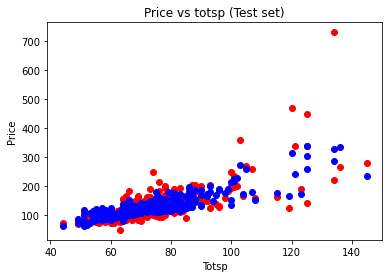

In [48]:
# Визуализируем нашу полученную модель. Как мы видим, что данная нейронная сеть наиболее точно описывает нашу выборку, в сравнении с другими моделями.
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_test[:,0], y_hat, 'bo')
plt.title('Price vs totsp (Test set)')
plt.xlabel('Totsp')
plt.ylabel('Price')
plt.show()